# Hierarchical clustering: ward method

It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

In [2]:
import pandas as pd
from scipy.cluster.vq import whiten
df = pd.read_csv("dataset/fifa_18_dataset.csv")
x = df.iloc[:,0]
y = df.iloc[:,1]
comic_con = pd.DataFrame({})
comic_con['x_scaled'] = whiten(x)
comic_con['y_scaled'] = whiten(y)

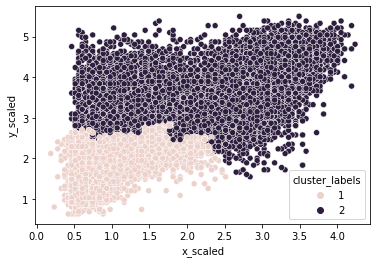

In [4]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster , linkage
import seaborn as sns
import matplotlib.pyplot as plt

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# Hierarchical clustering: single method

Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

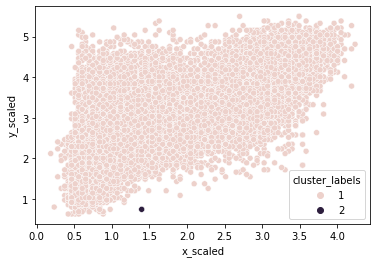

In [5]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster , linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled' , 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# Hierarchical clustering: complete method

For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

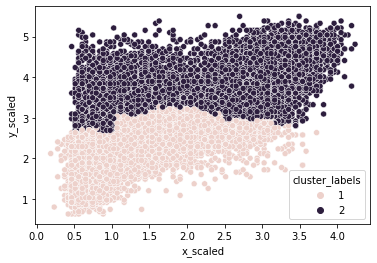

In [6]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster , linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled' , 'y_scaled']], method = 'complete', metric = 'euclidean')


# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# Visualize clusters with matplotlib

We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the `matplotlib` module.

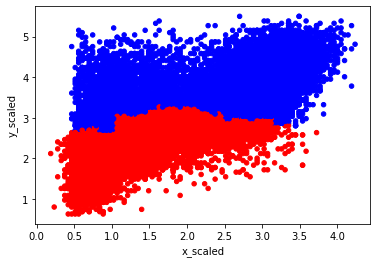

In [7]:
# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

# Visualize clusters with seaborn

Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild `hue` function for cluster labels.

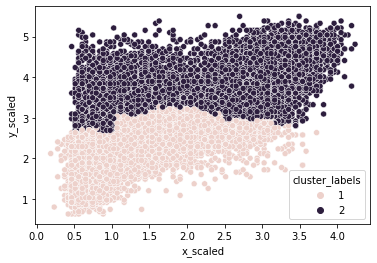

In [8]:
# Import the seaborn module
import  seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

# Create a dendrogram

Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

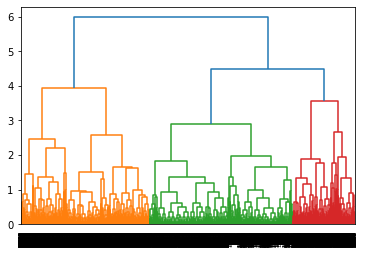

In [9]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

# How many clusters in comic con data?

Given the dendrogram from the last exercise, how many clusters can you see in the data?

- 2

# Timing run of hierarchical clustering

In earlier exercises of this chapter, you have used the data of Comic-Con footfall to create clusters. In this exercise you will time how long it takes to run the algorithm on DataCamp's system.
How long does it take to the run the `linkage` function on the comic con data?

In [10]:
%timeit linkage(comic_con[['x_scaled' , 'y_scaled']], method = 'complete', metric = 'euclidean')


8.76 s ± 656 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# FIFA 18: exploring defenders

In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

- sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
- aggression: a number between 0-99 which signifies the commitment and will of a player

These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

In [21]:
fifa = pd.read_csv("dataset/fifa_18_sample_data.csv")
# fifa = fifa.dropna()
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa[ 'aggression'])
# fifa.isna().any()

In [22]:

# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

In [23]:
# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())



                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.837810           4.280968
2                            0.579966           1.766698
3                            1.166930           3.415214


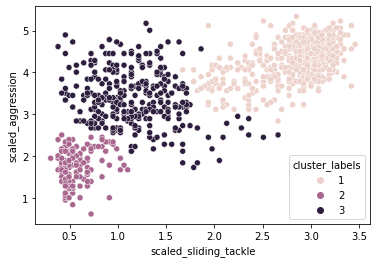

In [24]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()